# Walk through TIME - Basics of Time Series Analysis

![TSA1](Time-Series-Analysis_Heading_pic1.png)

Image source:https://www.educba.com/time-series-analysis/

# Introduction
Time Series Analysis
A time series is a series of data points indexed (or listed or graphed) in time order. Time series is a sequence taken at successive equally spaced points in time. Thus it is dependent on time as sequence of discrete-time data. Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.
<br>Time Series analysis can be useful to see how a given asset, security or economic variable changes over time. Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.

# Loading Data (from CSV file)

Loading csv file(or any other format file) using python pandas. 
* The Pandas library in Python provides excellent, built-in support for time series data.
* Pandas represents time series datasets as a **Series**. 
* A Series is a one-dimensional array with a time label for each row.
* A Dataframe is a collection of series of colums and rows, simply it is a table with rows and columns.

In [214]:
# importing librarires
import pandas as pd
import numpy as np
import warnings

In [215]:
# Download csv file from resources and put it in working directory, header =[0] column label as header of table
dataframe = pd.read_csv('daily-total-female-births-CA.csv', header=[0])

#### First five records

In [216]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Data Type

In [217]:
# To check data types of dataframe
dataframe['date'].dtype
dataframe.dtypes

date      object
births     int64
dtype: object

### Loading data with parse_dates

In [218]:
#Changing date from object to datetime format for analysis on date
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=[0] , parse_dates=[0])

#### First five records

In [219]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Data Type

In [220]:
# Change date column to datetime data type format
df2['date'].dtype

dtype('<M8[ns]')

In [221]:
# Change date to datetime format
df2.dtypes

date      datetime64[ns]
births             int64
dtype: object

#### Note: If there is critical datetime format is there, then we have to define arrangement of values
dateparse = lambda x: pd.datetime.strptime (x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(.........,parse_dates = [0], date_parser = dateparse)

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

### Loading Data as a series

Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index. Pandas Series is nothing but a column in an excel sheet.

In [222]:
#Squeeze will try to reduce the dimension if its possible to reduce. As you can see above dataframe reduced to 
#only one column as date column taken as index and its value taken as births, can be reduced to series by squeeze 
#parameter.
series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=[0], squeeze=True)

#### First 5 records

In [223]:
# Now table has index as date and its values as births column values
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [224]:
series.dtypes

dtype('int64')

# Exploring Time Series Data

#### Size

In [225]:
# As there is only one column in series index(date) and births
series.shape 

(365,)

In [226]:
# There are two columns in series index(date) and births
df2.shape

(365, 2)

### Querying by time

In [227]:
#prints selectively series data of only of Jan 1959
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [228]:
#Selecting date between a time period
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


### Descriptive Statistics (basic statistics)

In [229]:
# Descirbes basic statistics of series
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [230]:
# Descirbes basic statistics of dataframe2(ie, series, same as above)
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Feature Engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. A feature is an attribute or property shared by all of the independent units on which analysis or prediction is to be done. Any attribute could be a feature, as long as it is useful to the model or solving the problem. These features can be used to improve the performance of machine learning algorithms and differ data to data and problem to problem.

* Date time features
* Lag features
* Window features
* Expanding feature

### Date time features
Date related informations such as Date format, Year, Month, Day and their formats with its disintegration according to needs, same applies for Time format also.

In [231]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [232]:
# Making a copy of original dataset
features = df2.copy()

In [233]:
#Adding Year in our dataset
features['year'] = df2['date'].dt.year

In [234]:
#Adding Month in our dataset
features['month'] = df2['date'].dt.month

In [235]:
#Adding day in our dataset
features['day'] = df2['date'].dt.day

In [236]:
features.head(5)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/series.html#datetimelike-properties

### Lag features
Lag is essentially delay. Just as correlation shows how much two timeseries are similar, autocorrelation describes how similar the time series is with itself.
Consider a discrete sequence of values, for lag 1, you compare your time series with a lagged time series.

To create lag1 feature

In [237]:
features['lag1'] =  df2['births'].shift(1)

In [238]:
features['lag2'] =  df2['births'].shift(365)

In [239]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.shift.html#pandas.Series.shift

### Window feature (Rolling Window Feature)

The Forecast Point defines an arbitrary point in time that a prediction is being made. The Feature Derivation Window (FDW) defines a rolling window, relative to the Forecast Point, which can be used to derive descriptive features. Finally, the Forecast Window (FW) defines the range of future values we wish to predict, called Forecast Distances (FDs).
<br>Rolling window asses the stability of the model over time. A common time-series model assumption is that the coefficients are constant with respect to time. Checking for instability amounts to examining whether the coefficients are time-invariant.
The forecast accuracy of the model.

![window_feature](window_feature.png)
![rollingwindow](rollingwindow.png)

Image source:<br>
https://www.kdnuggets.com/2017/11/automated-feature-engineering-time-series-data.html<br>
https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html

In [240]:
# Rolling mean shifts in a window and calculates mean of the window.
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [241]:
features.head(5)

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [242]:
features['Roll_max'] = df2['births'].rolling(window = 3).max()

In [243]:
features.head(5)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.rolling.html#pandas.Series.rolling

### Expanding window features
This is extended version of the rolling window technique. In this rolling window, the size of the window is constant while the window slides as we move forward in time. Hence, we consider only the most recent values and ignore the past values.

In [244]:
features['Expand_max'] = df2['births'].expanding().max()

In [245]:
features.head(10)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,43.0,45.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.expanding.html#pandas.Series.expanding

# Data Visualization :
Time series data plot visualization is an important step as it helps to provides an insight on the data and understand what data is telling us and what we can infer from that details. Here below few popular vizualizations.

In [246]:
#importing library 
from matplotlib import pyplot as plt
%matplotlib inline

In [247]:
Dataviz_df = df2.copy()

In [248]:
Dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


<AxesSubplot:>

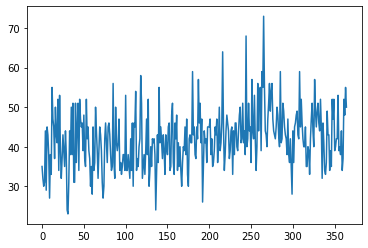

In [249]:
# In below plot, high seasonality and data is plotted i.e, index value is plotted against births
Dataviz_df['births'].plot()

In [250]:
# Changing index to dates for better insights in time
Dataviz_df.index = Dataviz_df['date'] 

<AxesSubplot:xlabel='date'>

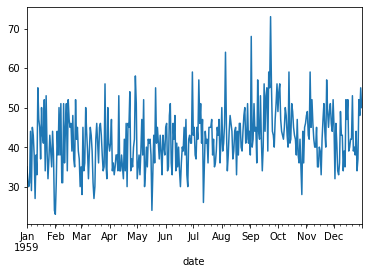

In [251]:
Dataviz_df['births'].plot()

### Zooming in/out data (for any pattern in data):

In [252]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()

In [253]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


<AxesSubplot:xlabel='date'>

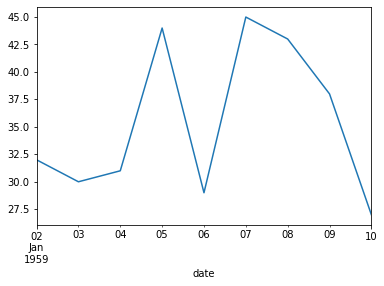

In [254]:
Dataviz_df2['births'].plot()

### Scatter plot and Trendline

In [255]:
import seaborn as sns

<AxesSubplot:ylabel='births'>

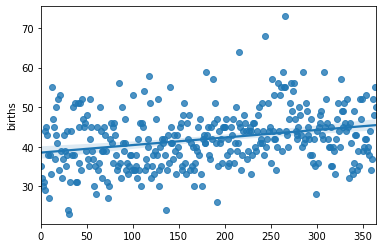

In [256]:
sns.regplot(x= df2.index.values, y=df2['births'])

<AxesSubplot:ylabel='births'>

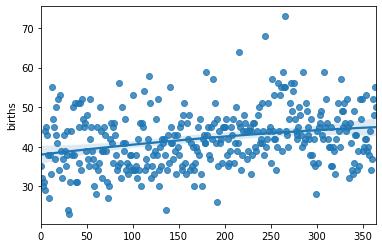

In [257]:
# For quadratic or exponential plots order of larger values used for better fit.
sns.regplot(x= df2.index.values, y=df2['births'], order =2)

In [258]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [259]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

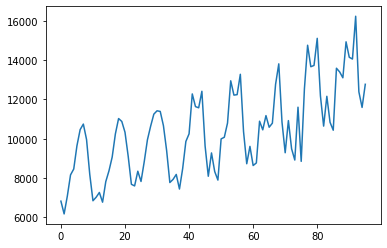

In [260]:
miles_df['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

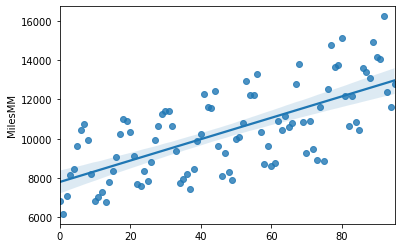

In [261]:
sns.regplot(x= miles_df.index.values, y=miles_df['MilesMM'])

# Stationarity
A stationary time series is one whose properties do not depend on the time at which the series is observed. Time series with TRENDS, or with SEASONALITY, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a WHITE NOISE(Error or Shock) series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

## Seasonality:
In time series data, seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly. Seasonality may be caused by various factors, such as weather, vacation or any event and consists of periodic, repetitive, and generally regular and predictable patterns in the levels of a time series.<br>

Seasonal fluctuations in a time series can be contrasted with cyclical patterns. The latter occur when the data exhibits rises and falls that are not of a fixed period. Such non-seasonal fluctuations are usually due to economic conditions and are often related to the "business cycle"; their period usually extends beyond a single year, and the fluctuations are usually of at least two years.

## Removing Seasonality: 
The model of seasonality can be removed from the time series. This process is called Seasonal Adjustment, or Deseasonalizing. A time series where the seasonal component has been removed is called seasonal stationary.
### Zooming in data (by upscaling data)
Zooming into a shorter period within the series can reveal patterns that are hidden when viewing the entire
series. This is especially important when the time series is long

In [262]:
miles_df['year'] = miles_df['Month'].dt.year

In [263]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [264]:
# group by apply with mean
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

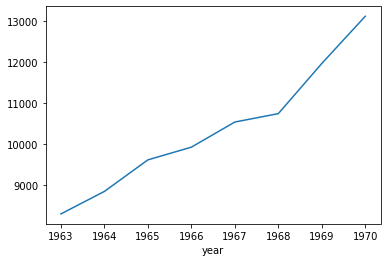

In [265]:
miles_df.groupby('year')['MilesMM'].mean().plot()

### Creating Lag plots

In [266]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [267]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

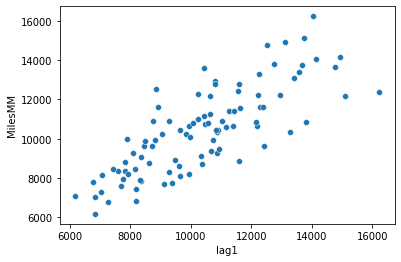

In [268]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

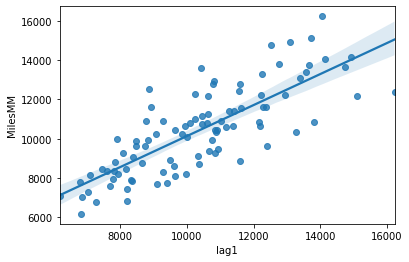

In [269]:
sns.regplot(x = miles_df['lag1'], y = miles_df['MilesMM'])

In [270]:
from pandas.plotting import lag_plot

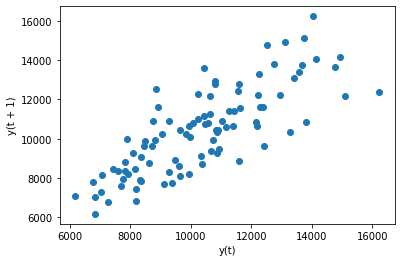

In [271]:
lag_plot(miles_df['MilesMM']);

### Autocorrelation Plots
Autocorrelation plots are a commonly-used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.

In [272]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

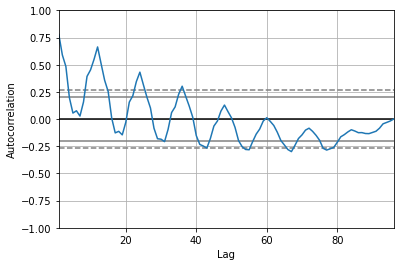

In [273]:
autocorrelation_plot(miles_df['MilesMM'])

# Transforms for Time Series Data

Any transform operations applied to the series also require a similar inverse transform to be applied on the predictions. This is required so that the resulting calculated performance measures are in the same scale as the output variable and can be compared to classical forecasting methods.
* Power Transform (lambda parameter)<br>
A power transform removes a shift from a data distribution(change scale of data) to make the distribution more-normal (Gaussian).It is a family of functions that are applied to create a monotonic transformation of data using power functions. This is a useful data transformation technique used to stabilize variance sepcially in time series, make the data more normal distribution-like, improve the validity of measures of association such as the Pearson correlation between variables and for other data stabilization procedures.<br>
Popular examples are the log transform (positive values) or generalized versions such as the Box-Cox transform (positive values) or the Yeo-Johnson transform (positive and negative values).

* Difference Transform<br>
A difference transform is a simple way for removing a systematic structure from the time series performed further in coding seeison.
For example, a trend can be removed by subtracting the previous value from each value in the series. This is called first order differencing. The process can be repeated (e.g. difference the differenced series) to remove second order trends, and so on.
* Standardization (mean and standard deviation statistics)<br>
Standardization is a transform for data with a Gaussian distribution, Mean and standard deviation is used for scaling.
It subtracts the mean and divides the result by the standard deviation of the data sample. This has the effect of transforming the data to have mean of zero, or centered, with a standard deviation of 1. This resulting distribution is called a standard Gaussian distribution, or a standard normal, hence the name of the transform.
<br>X_new = (X - mean)/Std
* Normalization (min and max values)<br>
Normalization is a rescaling of data from the original range to a new range between 0 and 1. This scales the range to [0, 1] or sometimes [-1, 1]. This transformation squishes the n-dimensional data into an n-dimensional unit hypercube. Normalization is useful when there are no outliers as it cannot cope up with them.
<br>X_new = (X - X_min)/(X_max - X_min)

## Time series - Resampling (Downsampling and Upsampling)

In [274]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [275]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


### Downsampling
Contraction of data points (or index) without loss of information. 

In [276]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [277]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [278]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [279]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


| Alias  | Description           |
|--------|-----------------------|
| B      | Business day          |
| D      | Calendar day          |
| W      | Weekly                |
| M      | Month end             |
| Q      | Quarter end           |
| A      | Year end              |
| BA     | Business year end     |
| AS     | Year start            |
| H      | Hourly frequency      |
| T, min | Minutely frequency    |
| S      | Secondly frequency    |
| L, ms  | Millisecond frequency |
| U, us  | Microsecond frequency |
| N, ns  | Nanosecond frequency  |

### Upsampling
Expansion of data points (or index) without addition of new information. 

In [280]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [281]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [282]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [283]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


In [284]:
interpolated_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<AxesSubplot:xlabel='Month'>

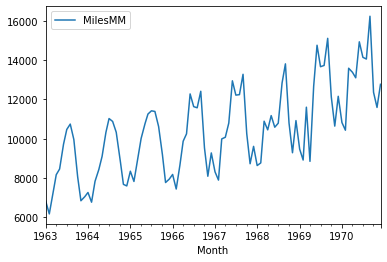

In [285]:
interpolated_miles_df.plot()

In [286]:
# Using of interpolate function of order 2 in plot, to make soft Time series
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

<AxesSubplot:xlabel='Month'>

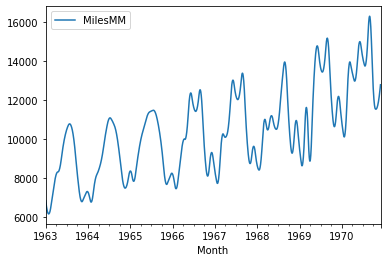

In [287]:
poly_interpolated_miles_df.plot()

| Method  | Description                                               |
|---------|-----------------------------------------------------------|
| bfill   | Backward fill                                             |
| count   | Count of values                                           |
| ffill   | Forward fill                                              |
| first   | First valid data value                                    |
| last    | Last valid data value                                     |
| max     | Maximum data value                                        |
| mean    | Mean of values in time range                              |
| median  | Median of values in time range                            |
| min     | Minimum data value                                        |
| nunique | Number of unique values                                   |
| ohlc    | Opening value, highest value, lowest value, closing value |
| pad     | Same as forward fill                                      |
| std     | Standard deviation of values                              |
| sum     | Sum of values                                             |
| var     | Variance of values                                        |

# Decomposing Time Series
The decomposition of time series is a statistical process that deconstructs a time series into several components, each representing one of the underlying categories of patterns.
This is an important technique for all types of time series analysis, especially for seasonal adjustment.[2] It seeks to construct, from an observed time series, a number of component series (that could be used to reconstruct the original by additions or multiplications) where each of these has a certain characteristic or type of behavior. For example, time series are usually decomposed into:

* Trend: The trend component at time t, which reflects the long-term progression of the series (secular variation). A trend exists when there is a persistent increasing or decreasing direction in the data. The trend component does not have to be linear.

* Seasonal: The seasonal component at time t, reflecting seasonality (seasonal variation). A seasonal pattern exists when a time series is influenced by seasonal factors. Seasonality occurs over a fixed and known period (e.g., the quarter of the year, the month, or day of the week).

* Cyclic: The cyclical component at time t, which reflects repeated but non-periodic fluctuations. The duration of these fluctuations depend on the nature of the time series.

* Irregular (Noise): The irregular component (or "noise") at time t, which describes random, irregular influences. It represents the residuals or remainder of the time series after the other components have been removed.

**Additive Model** 

y(t) = Trend + Seasonality + Cyclic + Noise

**Multiplicative Model** 

y(t) = Trend * Seasonality * Cyclic * Noise

In [288]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [289]:
miles_decomp_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [290]:
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [291]:
miles_decomp_df.index = miles_decomp_df['Month'] 

In [292]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

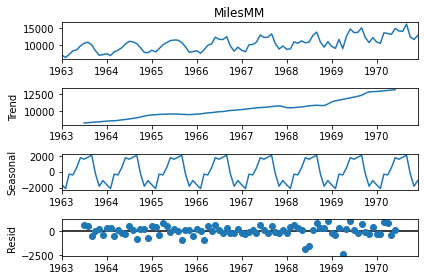

In [293]:
result.plot()
plt.show()

In [294]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

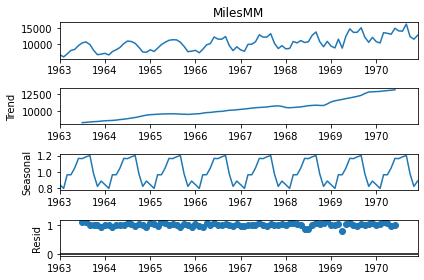

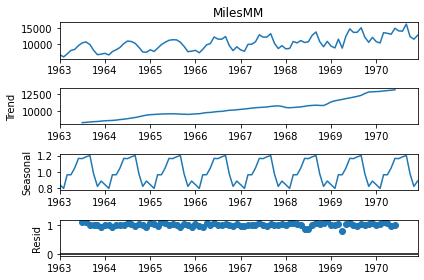

In [295]:
result2.plot()

### Differencing

In [296]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [297]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [298]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [299]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [300]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


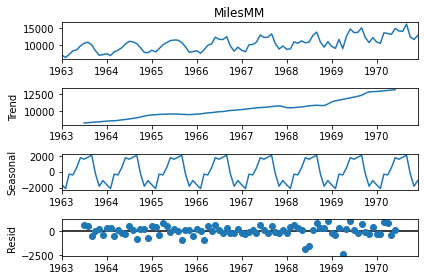

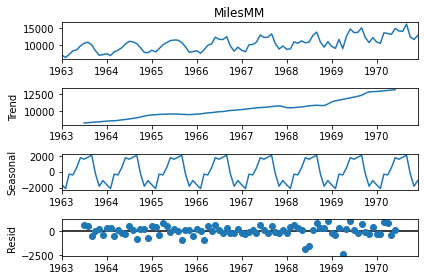

In [301]:
miles_df.index = miles_df['Month'] 
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

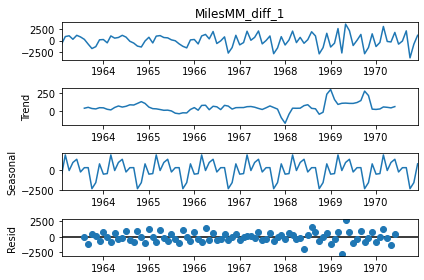

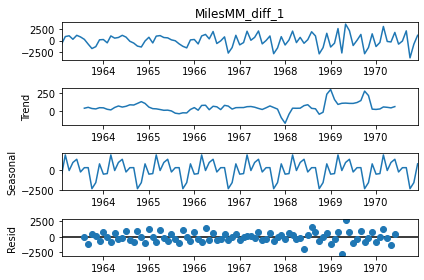

In [302]:
miles_df.index = miles_df['Month'] 
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

<AxesSubplot:xlabel='Month'>

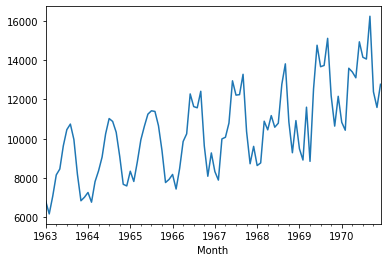

In [303]:
miles_df['MilesMM'].plot()

<AxesSubplot:xlabel='Month'>

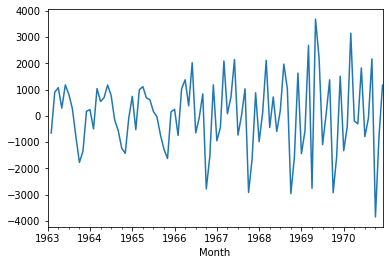

In [304]:
miles_df['MilesMM_diff_1'].plot() 

In [305]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<AxesSubplot:xlabel='Month'>

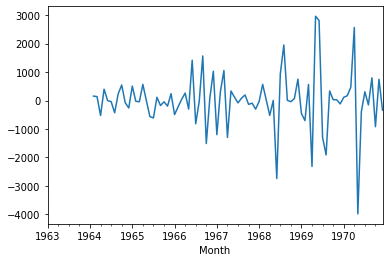

In [306]:
miles_df['MilesMM_diff_12'].plot() 

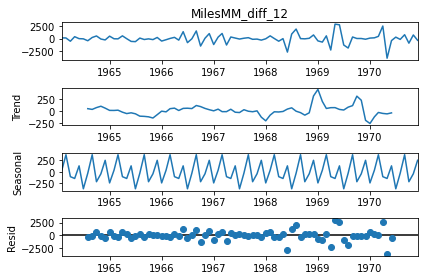

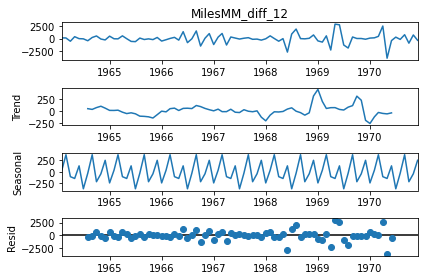

In [307]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

In [308]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


## Test-Train Split
Splitting data frame (or arrays) into two subsets: for training data and for testing data.

In [309]:
temp_df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [310]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [311]:
temp_df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [312]:
temp_df.shape

(3650, 2)

In [313]:
temp_df.shape[0]

3650

In [314]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [315]:
train =  temp_df[0:train_size]

In [316]:
test =  temp_df[train_size:]

In [317]:
train.shape

(2920, 2)

In [318]:
test.shape

(730, 2)

## Walk Forward Validation :
In time series modelling, the predictions over time become less and less accurate and hence it is a more realistic approach to re-train the model with actual data as it gets available for further predictions. Since training of statistical models are not time consuming, walk-forward validation is the most preferred solution to get most accurate results.

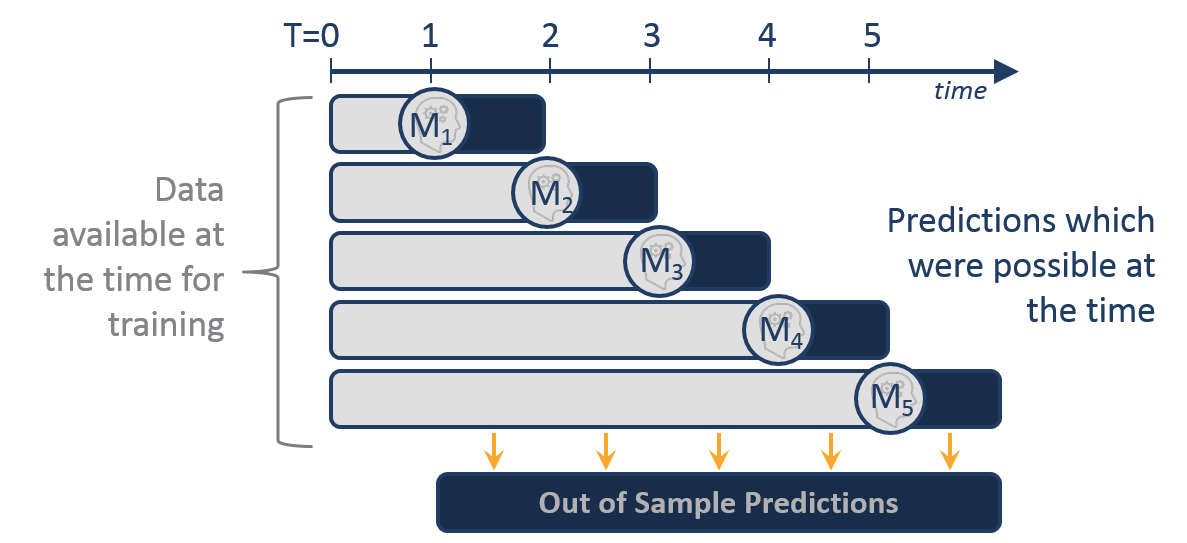

## Random Walk Model :

### 1. Persistence Model (Naive forecast):
In persistence or Naive forecast model we assume that the last time period value is the forecast for this(current) period.

In [319]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [320]:
# first five values of dataframe df, previous day temp value is todays temp value, so we shift value by one day.
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [321]:
df['t'] =  df['Temp'].shift(1)

In [322]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [323]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [324]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [325]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

### walk-forward validation (of persistance model)

In [326]:
predictions = test_X.copy()

In [327]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [328]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [329]:
import matplotlib.pyplot as plt

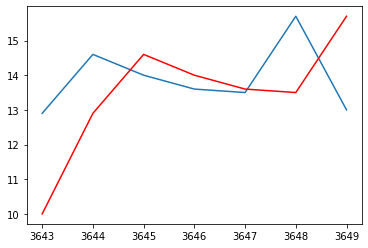

In [330]:
plt.plot(test_y)
plt.plot(predictions, color='red')

### 2. Autoregression Model (AR Model) 
[Not Applied to Those Time series which has Trend and Seasonality]<br>
AR model for short, relies only on past period values to predict current ones (as model says regression of itself from its previous time values). AR model is running a regression model on the lagged values and using using it in future values.
It’s a linear model, where current period values are a sum of past outcomes multiplied by a numeric factor. 
This model can only be used on series without trend and seasonality.

In [331]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [332]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [333]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [334]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [335]:
from statsmodels.tsa.ar_model import AR

In [336]:
model = AR(train)
model_fit = model.fit()

/Users/hiteshtripathi/myenv/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futur

#### No. of lag Variables

In [337]:
model_fit.k_ar

29

#### Coef of lag variables

In [338]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [339]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [340]:
print(predictions)
print(test)

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [341]:
predictions.iloc[0]

11.87127484772784

In [342]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
mse

1.501525231006946

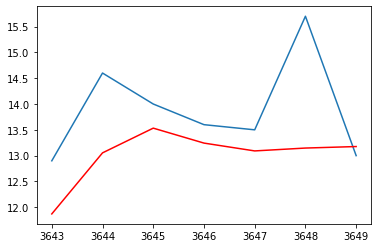

In [343]:
plt.plot(test)
plt.plot(predictions, color='red')

### Walk Forward validation (for AR model)

In [344]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [345]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [346]:
data = train
predict =[]
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)

11.87127484772784
13.660699943835198
14.353164144090167
13.430120791627
13.374756477185125
13.479111299420508
14.76777301843986


/Users/hiteshtripathi/myenv/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futur

In [347]:
print(predict)
print(test_y)

[11.87127484772784, 13.660699943835198, 14.353164144090167, 13.430120791627, 13.374756477185125, 13.479111299420508, 14.76777301843986]
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [348]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y.values, predict)
mse

1.4524568425185247

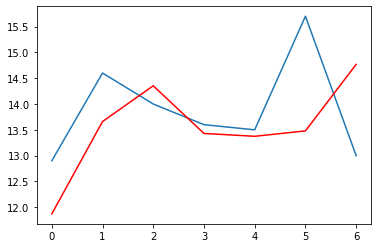

In [349]:
plt.plot(test_y.values)
plt.plot(predict, color='red')

# Smoothing----- Describe in detail!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Smoothing data removes random variation and shows trends and cyclic components.
We use MA smoothing and Exponential smoothing, when there is no trend or seasonality in series.

### 3. Moving Average Model (MA Model)
[Not Applied to Those Time series which has Trend and Seasonality]

Moving averages are of two types Centered MA and Trailing MA. MA is method used for smoothening. Trailing MA is used in 
* Feature Engineering
* Forecasting

In [350]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [351]:
df['t'] =  df['Temp'].shift(1)

In [352]:
df['Resid'] = df['Temp'] - df['t']

In [353]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [354]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [355]:
# to see residual values in train set 
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [356]:
test.head()

3643    2.9
3644    1.7
3645   -0.6
3646   -0.4
3647   -0.1
Name: Resid, dtype: float64

In [357]:
from statsmodels.tsa.ar_model import AR

In [358]:
model = AR(train)
model_fit = model.fit()

/Users/hiteshtripathi/myenv/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futur

In [359]:
# k_ar is lag length or residual variables
model_fit.k_ar

29

https://www.statsmodels.org/dev/generated/statsmodels.tsa.ar_model.ARResults.html

In [360]:
# to find coefficients of above variables, these are lag values of residuals of Naive forecasts model
model_fit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [361]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [362]:
# forecasted residuals
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [363]:
# forecasted values
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [364]:
predictions = df.t[df.shape[0]-7:] + pred_resid

In [365]:
print(predictions)
print(test_y)

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [366]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

2.049398556648208

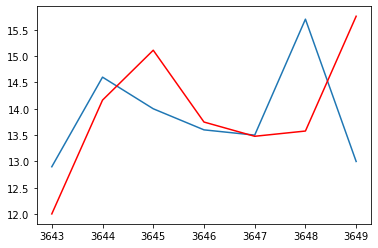

In [367]:
plt.plot(test_y)
plt.plot(predictions, color='red')

### Walk Forward validation (for MA model)

In [368]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [369]:
df['t'] = df['Temp'].shift(1)
df['resid'] = df['Temp'] - df['t']

In [370]:
df['resid'].shape[0]

3650

In [371]:
train, test = df.resid[1:df.shape[0]-7], df.resid[df.shape[0]-7:]

In [372]:
from statsmodels.tsa.ar_model import AR

In [373]:
model = AR(train)
model_fit = model.fit()

/Users/hiteshtripathi/myenv/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futur

In [374]:
model_fit.k_ar

29

In [375]:
model_fit.params

const       -0.006415
L1.resid    -0.407139
L2.resid    -0.496194
L3.resid    -0.445747
L4.resid    -0.403706
L5.resid    -0.362528
L6.resid    -0.334810
L7.resid    -0.288468
L8.resid    -0.274281
L9.resid    -0.235333
L10.resid   -0.234799
L11.resid   -0.228532
L12.resid   -0.208608
L13.resid   -0.180324
L14.resid   -0.178425
L15.resid   -0.152265
L16.resid   -0.143617
L17.resid   -0.132501
L18.resid   -0.097075
L19.resid   -0.104927
L20.resid   -0.079371
L21.resid   -0.059348
L22.resid   -0.045921
L23.resid   -0.063197
L24.resid   -0.063441
L25.resid   -0.045061
L26.resid   -0.023578
L27.resid   -0.011882
L28.resid   -0.003789
L29.resid   -0.003422
dtype: float64

In [376]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [377]:
data = train
predict =[]
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    predictions = df.t[df.shape[0]-7:] + pred_resid

2.0049858425321654
2.011976539063099
2.012835768889391
2.0118487807255345
2.0118636025909202
2.011899877374054
2.0103182855377875


In [378]:
# forecasted residuals
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [379]:
# forecasted values
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [380]:
#predictions = df.t[df.shape[0]-7:] + pred_resid

In [381]:
print(predictions)
print(test_y)

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [382]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

2.049398556648208

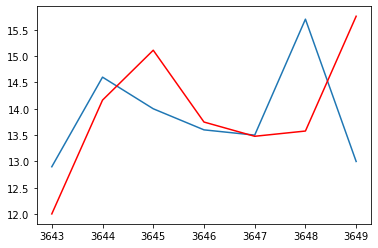

In [383]:
plt.plot(test_y)
plt.plot(predictions, color='red')

## Exponential smoothing

## 4. Auto Regressive Integrated Moving Average Model (ARIMA Model)
Combination of both AR with Integrated MA model to handle TREND (NOT SEASONALITY). It Integrates Differencing method into ARMA to handle any type of series with Trend. Differencing used to Deseasonalize and DeTrend the Data.

In [384]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [385]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [386]:
df['Date']=pd.to_datetime('190'+df.Month,format='%Y-%m')

def parser(x):
return datetime.strptime('190'+x, '%Y-%m')

In [387]:
df.head()

,Month,Sales,Date
0,1-01,266.0,1901-01-01
1,1-02,145.9,1901-02-01
2,1-03,183.1,1901-03-01
3,1-04,119.3,1901-04-01
4,1-05,180.3,1901-05-01


<AxesSubplot:>

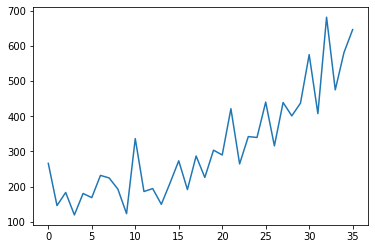

In [388]:
df=df.dropna()
df['Sales'].plot()

Line plot to determine Trend which is Polynomial.  
D =2

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

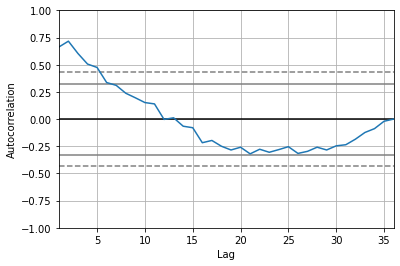

In [389]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

in ACF plot the line is crossing 95% Confidence Interval(upper) at near about 5 Lag and at 5 Lag our 99% C.I(dotted line), so we take order of Moving Average (q)   
 q = 5 

### Partial Autocorrelation Graph

In [390]:
from statsmodels.graphics.tsaplots import plot_pacf

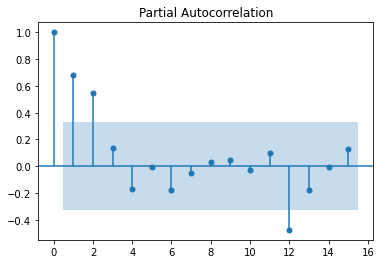

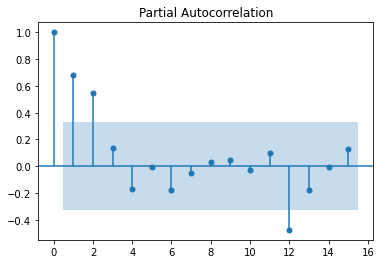

In [391]:
plot_pacf(df['Sales'], lags=15)
# Here the blue band is our CI

As in PACF plot lag = 2,is above our CI band, So order of Autoregression (p)
p = 2

In [392]:
from statsmodels.tsa.arima_model import ARIMA

In [393]:
model = ARIMA(df['Sales'], order=(5,1,0))

In [394]:
model_fit = model.fit()

In [395]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sat, 12 Dec 2020   AIC                            406.340
Time:                        14:18:00   BIC                            417.227
Sample:                             1   HQIC                           410.098
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     -2.203      0.028      -1.172      -0.068
ar.L3.D.Sales    -0.3606      0.295     -1.222      0.222      -0.939       0.218
ar.L4.D.Sales    -0.1252      0.280     -0.447      0.655      -0.674       0.424
ar.L5.D.Sales     0.1289      0.191      0.673      0.501      -0.246       0.504
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0617           -0.5064j            1.1763           -0.4292
AR.2           -1.0617           +0.5064j            1.1763            0.4292
AR.3            0.0816           -1.3804j            1.3828           -0.2406
AR.4            0.0816           +1.3804j            1.3828            0.2406
AR.5            2.9315           -0.0000j            2.9315           -0.0000
-----------------------------------------------------------------------------
"""

In [396]:
residuals = model_fit.resid

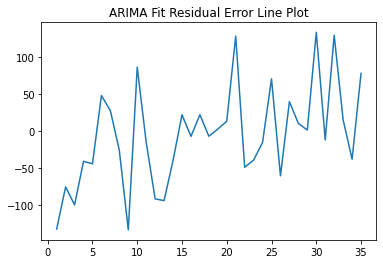

In [397]:
residuals.plot()
plt.title('ARIMA Fit Residual Error Line Plot')
plt.show()

In [398]:
residuals.describe()

count     35.000000
mean      -5.495234
std       68.132881
min     -133.296633
25%      -42.477956
50%       -7.186574
75%       24.748332
max      133.237952
dtype: float64

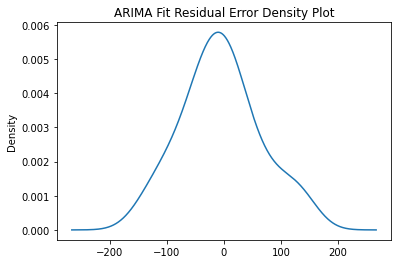

count     35.000000
mean      -5.495234
std       68.132881
min     -133.296633
25%      -42.477956
50%       -7.186574
75%       24.748332
max      133.237952
dtype: float64


In [399]:
residuals.plot(kind='kde')
plt.title('ARIMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [400]:
output = model_fit.forecast()

In [401]:
# (array([forecasted value]), array([std. dev]),array([95% CI])
output

(array([564.21359712]),
 array([64.24141921]),
 array([[438.30272914, 690.12446509]]))

In [402]:
model_fit.forecast(5)[0]

array([564.21359712, 675.40647003, 577.12713196, 689.55757492,
       641.86603333])

### Walk Forward ARIMA

In [403]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [404]:
df['Date']=pd.to_datetime('190'+df.Month,format='%Y-%m')
df.head()

,Month,Sales,Date
0,1-01,266.0,1901-01-01
1,1-02,145.9,1901-02-01
2,1-03,183.1,1901-03-01
3,1-04,119.3,1901-04-01
4,1-05,180.3,1901-05-01


In [405]:
train_size = int(df.shape[0]*0.7)

In [406]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [407]:
test.shape

(11,)

In [408]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

387.3764404981621
348.15416249747784
386.3088144190368
356.0820171217331
446.3795089632286
394.7372827814123
434.9155768596469
507.9234617415654
435.4828948320534
652.7437782617781
546.3434518101616


In [409]:
predict

[387.3764404981621,
 348.15416249747784,
 386.3088144190368,
 356.0820171217331,
 446.3795089632286,
 394.7372827814123,
 434.9155768596469,
 507.9234617415654,
 435.4828948320534,
 652.7437782617781,
 546.3434518101616]

In [410]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

8119.124428575093

## 5. SARIMA or Seasonal ARIMA 

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [411]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [412]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [413]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [414]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [415]:
df.index = df['Month'] 

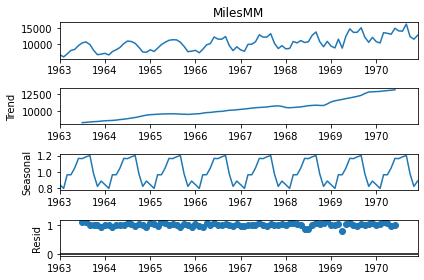

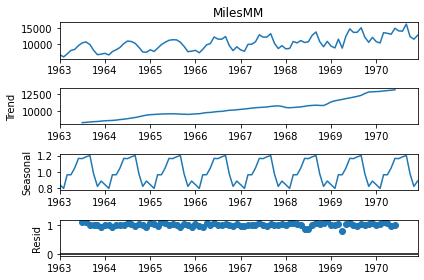

In [416]:
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [417]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

/Users/hiteshtripathi/myenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/hiteshtripathi/myenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [418]:
model_fit = model.fit()

/Users/hiteshtripathi/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/hiteshtripathi/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/hiteshtripathi/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [419]:
residuals = model_fit.resid

<AxesSubplot:xlabel='Month'>

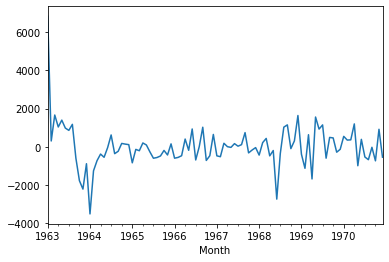

In [420]:
residuals.plot()

In [421]:
output = model_fit.forecast()

In [422]:
output

1971-01-01    11475.215262
Freq: MS, dtype: float64

In [423]:
model_fit.forecast(12)

1971-01-01    11475.215262
1971-02-01    11153.297197
1971-03-01    13668.562912
1971-04-01    12646.300030
1971-05-01    14338.988148
1971-06-01    15785.696271
1971-07-01    14978.436889
1971-08-01    15361.992103
1971-09-01    16962.148872
1971-10-01    13681.997525
1971-11-01    12426.563624
1971-12-01    13729.370824
Freq: MS, dtype: float64

In [424]:
yhat = model_fit.predict()

In [425]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5871.587558
1963-03-01    5421.172735
1963-04-01    7123.700398
1963-05-01    7066.024331
Freq: MS, dtype: float64

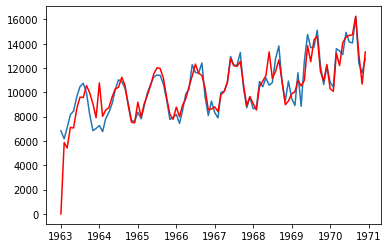

In [427]:
plt.plot(df['MilesMM'])
plt.plot(yhat, color='red')

## References:

* https://en.wikipedia.org/wiki/Time_series
* https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4.htm
* https://www.udemy.com/course/machine-learning-time-series-forecasting-in-python/
* https://www.geeksforgeeks.org/python-pandas-series/
* https://pandas.pydata.org/docs/user_guide/index.html#user-guide
* https://numpy.org/doc/stable/user/absolute_beginners.html
* http://math.stackexchange.com/questions/2548314/ddg#2548350
* https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html
* https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/
* https://machinelearningmastery.com/machine-learning-data-transforms-for-time-series-forecasting/
* https://www.geeksforgeeks.org/normalization-vs-standardization/
* https://en.wikipedia.org/wiki/Decomposition_of_time_series
* https://www.kaggle.com/minhvo/arima-model-for-time-series-forecasting
* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/